<a href="https://colab.research.google.com/github/ajaysaikiran2208/Natural-Language-Processing/blob/main/Text_classification_using_Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Text Classification using **Naive Bayes Classifier**

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
data=fetch_20newsgroups()
data.target_names

In [3]:
#defining all categories
categories=['alt.atheism','comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.windows.x','misc.forsale','rec.autos', 'rec.motorcycles','rec.sport.baseball','rec.sport.hockey','sci.crypt','sci.electronics','sci.med','sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

train=fetch_20newsgroups(subset='train',categories=categories)
test=fetch_20newsgroups(subset='test',categories=categories)
print(train.data[5])

From: lisbon@vpnet.chi.il.us (Gerry Swetsky)
Subject: Program manager ** two questions
Organization: Vpnet Public Access
Lines: 16


(1) Is it possible to change the icons in the program groups?  I'd like
    to give them some individuality.

(2) Can you set up a short-cut key to return to the Program Manager? 
    I know <CTL><ESC>, <ESC> will do it, but I'd rather set it up so I 
    can avoid the task list and get back to the P/M with <ALT><F1>.

Any and all help is welcomed.

--
| Help stamp out stupid .signature files!           Gerry Swetsky  WB9EBO  |
|                 vpnet - Public access Unix and Usenet                    |
| Home (708)833-8122       vpnet (708)833-8126      lisbon@vpnet.chi.il.us |



In [6]:
print(len(train.data))

10736


In [7]:
#Importing required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model=make_pipeline(TfidfVectorizer(),MultinomialNB())

model.fit(train.data,train.target)
labels=model.predict(test.data)

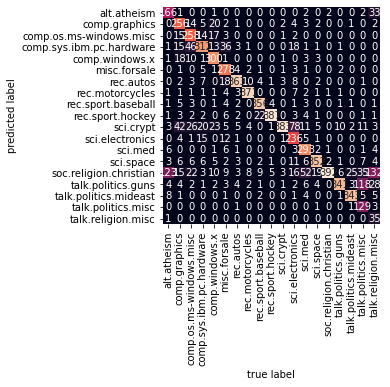

In [9]:
#Creating Heat map tho indicate relation of between the labels
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [11]:
#writing a function to predict new words and label them
def predict_category(s,train=train,model=model):
  pred=model.predict([s])
  return train.target_names[pred[0]]

In [31]:
predict_category("President of India")

'talk.politics.misc'